In [4]:
from timeit import default_timer as timer

from ClasificadorAG import ClasificadorAG, REPRESENTACION_BINARIA
from Datos import Datos
from ValidacionSimple import ValidacionSimple

start = timer()

datos = Datos('ConjuntosDatos/wdbc.data')
val = ValidacionSimple(60)

val.creaParticiones(datos.datos)
ag = ClasificadorAG()
datos_train = datos.extraeDatos(val.particiones[0].indicesTrain)

ag.entrenamiento(datos_train, datos.nominalAtributos, datos.diccionarios, max_reglas=2, num_generaciones=100,
                 representacion=REPRESENTACION_BINARIA, prob_mutacion=0.01)


print(ag.fitness_apriori)
print(ag.mejor_individuo)

end = timer()
print("\nTiempo de ejecución:", end - start)


0.6304985337243402
[[217, 56, 204, 258, 0, 186, 326, 0, 362, 358, 42, 220, 280, 0, 490, 273, 0, 270, 123, 177, 0, 0, 0, 0, 0, 124, 49, 510, 0, 332, 0], [0, 0, 0, 0, 27, 0, 0, 0, 0, 0, 459, 0, 0, 339, 0, 0, 271, 0, 0, 0, 0, 0, 0, 0, 0, 0, 238, 143, 0, 0, 1]]

Tiempo de ejecución: 21.620733008000002


In [5]:
datos_test = datos.extraeDatos(val.particiones[0].indicesTest)

pred = ag.clasifica(datos_test, datos.nominalAtributos, datos.diccionarios)

errores = datos_test[:, -1] != pred

tasa_de_error = sum(errores) / len(errores)

print(tasa_de_error)

0.21929824561403508


In [29]:
errores, tasa_de_error = ag.validacion(val, datos, ag)
        
print("\nTasa de error:", tasa_de_error)

Generación: 0, 

1, 2, 

3, 4, 

5, 6, 

7, 8, 

9, 10, 

11, 12, 

13, 14, 

15, 16, 

17, 18, 

19, 20, 

21, 22, 

23, 24, 

25, 26, 

27, 28, 

29, 30, 

31, 32, 

33, 34, 

35, 36, 

37, 38, 

39, 40, 

41, 42, 

43, 44, 

45, 46, 

47, 48, 

49, 50, 

51, 52, 

53, 54, 

55, 56, 

57, 58, 

59, 60, 

61, 62, 

63, 64, 

65, 66, 

67, 68, 

69, 70, 

71, 72, 

73, 74, 

75, 76, 

77, 78, 

79, 80, 

81, 82, 

83, 84, 

85, 86, 

87, 88, 

89, 90, 

91, 92, 

93, 94, 

95, 96, 

97, 98, 

99, 100
	Tasa de error: 0.2850877192982456


In [6]:
from timeit import default_timer as timer

from ClasificadorAG import ClasificadorAG
from Datos import Datos
from ValidacionSimple import ValidacionSimple

ag = ClasificadorAG()
val = ValidacionSimple(60)

conjuntos_de_datos = ['example1', 'example3', 'example4', 'wdbc']
num_individuos_list = [100, 200]
num_generaciones_list = [100, 500, 1000]

for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    val.creaParticiones(datos.datos)
    
    print(nombre_fichero, ":", sep='')
    for num_individuos in num_individuos_list:
        for num_generaciones in num_generaciones_list:
            start = timer()
            errores, tasa_de_error = ag.validacion(val, datos, ag, num_generaciones, num_individuos)
            
            print("\tNum_individuos=", num_individuos, " ,num_generaciones=", num_generaciones, sep='')
            print("\t\tTasa de aciertos:", 1 - tasa_de_error)
            print("\t\tMejor fitness:", ag.stats[-1, -1])
            print("\t\tTiempo necesario:", timer() - start)


example1:


	Num_individuos=100 ,num_generaciones=100
		Tasa de aciertos: 0.5125
		Mejor fitness: 0.7125
		Tiempo necesario: 12.321850711000025


	Num_individuos=100 ,num_generaciones=500
		Tasa de aciertos: 0.49375
		Mejor fitness: 0.6875
		Tiempo necesario: 58.89448998099988


	Num_individuos=100 ,num_generaciones=1000
		Tasa de aciertos: 0.42500000000000004
		Mejor fitness: 0.7166666666666667
		Tiempo necesario: 127.398352144


	Num_individuos=200 ,num_generaciones=100
		Tasa de aciertos: 0.44375
		Mejor fitness: 0.7291666666666666
		Tiempo necesario: 20.417627703000107


	Num_individuos=200 ,num_generaciones=500
		Tasa de aciertos: 0.5375
		Mejor fitness: 0.6875
		Tiempo necesario: 121.27824749199999


	Num_individuos=200 ,num_generaciones=1000
		Tasa de aciertos: 0.49375
		Mejor fitness: 0.7958333333333333
		Tiempo necesario: 267.4058192320001
example3:


	Num_individuos=100 ,num_generaciones=100
		Tasa de aciertos: 0.50625
		Mejor fitness: 0.6041666666666666
		Tiempo necesario: 9.44792345499991


	Num_individuos=100 ,num_generaciones=500
		Tasa de aciertos: 0.5
		Mejor fitness: 0.5958333333333333
		Tiempo necesario: 60.02437265499998


	Num_individuos=100 ,num_generaciones=1000
		Tasa de aciertos: 0.525
		Mejor fitness: 0.5833333333333334
		Tiempo necesario: 100.80685305499992


	Num_individuos=200 ,num_generaciones=100
		Tasa de aciertos: 0.53125
		Mejor fitness: 0.5708333333333333
		Tiempo necesario: 20.504951522999818


	Num_individuos=200 ,num_generaciones=500
		Tasa de aciertos: 0.48750000000000004
		Mejor fitness: 0.6541666666666667
		Tiempo necesario: 137.43010221600002


	Num_individuos=200 ,num_generaciones=1000
		Tasa de aciertos: 0.5
		Mejor fitness: 0.6
		Tiempo necesario: 246.508527038
example4:


	Num_individuos=100 ,num_generaciones=100
		Tasa de aciertos: 0.975
		Mejor fitness: 1.0
		Tiempo necesario: 2.5739338210000824


	Num_individuos=100 ,num_generaciones=500
		Tasa de aciertos: 0.975
		Mejor fitness: 1.0
		Tiempo necesario: 14.700500538999677


	Num_individuos=100 ,num_generaciones=1000
		Tasa de aciertos: 1.0
		Mejor fitness: 1.0
		Tiempo necesario: 23.140378760000203


	Num_individuos=200 ,num_generaciones=100
		Tasa de aciertos: 0.975
		Mejor fitness: 1.0
		Tiempo necesario: 6.654773521999687


	Num_individuos=200 ,num_generaciones=500
		Tasa de aciertos: 1.0
		Mejor fitness: 1.0
		Tiempo necesario: 24.716871034000178


	Num_individuos=200 ,num_generaciones=1000
		Tasa de aciertos: 1.0
		Mejor fitness: 1.0
		Tiempo necesario: 65.03443855500018
wdbc:


	Num_individuos=100 ,num_generaciones=100
		Tasa de aciertos: 0.6491228070175439
		Mejor fitness: 0.7595307917888563
		Tiempo necesario: 16.00991027400005


	Num_individuos=100 ,num_generaciones=500
		Tasa de aciertos: 0.5570175438596492
		Mejor fitness: 0.8152492668621701
		Tiempo necesario: 123.02595494000025


	Num_individuos=100 ,num_generaciones=1000
		Tasa de aciertos: 0.6403508771929824
		Mejor fitness: 0.7038123167155426
		Tiempo necesario: 235.37329007400012


	Num_individuos=200 ,num_generaciones=100
		Tasa de aciertos: 0.6359649122807017
		Mejor fitness: 0.7771260997067448
		Tiempo necesario: 37.419016075999934


	Num_individuos=200 ,num_generaciones=500
		Tasa de aciertos: 0.5964912280701755
		Mejor fitness: 0.7536656891495601
		Tiempo necesario: 118.86603947200001


	Num_individuos=200 ,num_generaciones=1000
		Tasa de aciertos: 0.7763157894736842
		Mejor fitness: 0.6832844574780058
		Tiempo necesario: 408.84416859600015


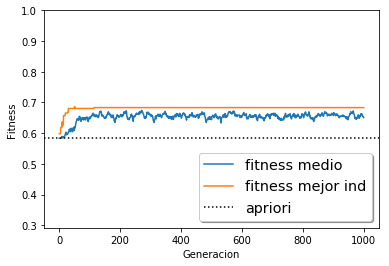

In [8]:
import matplotlib.pyplot as mp
mp.plot(ag.stats[:,0], label='fitness medio')
mp.plot(ag.stats[:,1], label='fitness mejor ind')
mp.axhline(y=ag.fitness_apriori, label='apriori', color='black', linestyle=':')
mp.xlabel('Generacion')
mp.ylabel('Fitness')
mp.ylim(ag.fitness_apriori/2,1.0)
mp.legend(loc='lower right', shadow=True, fontsize='x-large')